In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

# Edge List Loading

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def plot(G):
    nx.draw_networkx(G, with_labels = True)
    plt.draw()
    plt.show()

In [4]:
import os

def load(filepath, name = None):
    line_counter = 0
    if name == None: name = os.path.basename(filepath)
    G = nx.Graph(name = name)
    with open(filepath, 'r') as file:
        for line in file:
            v = line.split(',')
            G.add_edge(v[0], v[1][:-1])
            line_counter += 1
            if line_counter % 100000 == 0: print(line_counter, 'lines processed')
    print('====== SUMMARY ======')
    print(nx.info(G))
    return G

In [5]:
G = load('Dynamic_coexp_Networks/6D_sen_net.csv')

====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 333
Number of edges: 1363
Average degree:   8.1862


In [6]:
def remove_self_loop(G):
    G.remove_edges_from(G.selfloop_edges())
    print('====== SUMMARY ======')
    print(nx.info(G))
    return G

In [7]:
G = remove_self_loop(G)

====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 333
Number of edges: 1356
Average degree:   8.1441


# k-Core

In [8]:
import time

def core_sketch(G):
    start_time = time.time()
    sketch = nx.core_number(G)
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return sketch, max(sketch.values())

def core_components(G, k, sketch):
    start_time = time.time()
    k_core = nx.k_core(G, k=k, core_number=sketch)
    print('====== SUMMARY ======')
    print(nx.info(k_core))
    graphs = nx.connected_component_subgraphs(k_core)
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return list(graphs)

def report(components):
    start_time = time.time()
    for g in components:
        print(nx.info(g))
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')

In [9]:
sketch, max_core = core_sketch(G)
print('max_core:', max_core)

Time Elapsed: 0.002227306365966797 seconds
max_core: 12


In [10]:
graphs = core_components(G, max_core, sketch)

====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 18
Number of edges: 136
Average degree:  15.1111
Time Elapsed: 0.0014431476593017578 seconds


In [11]:
report(graphs)

Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 18
Number of edges: 136
Average degree:  15.1111
Time Elapsed: 0.00015687942504882812 seconds


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


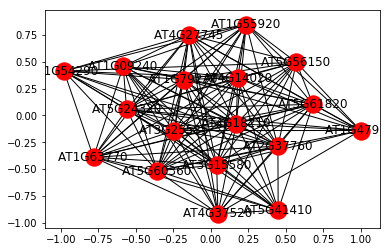

In [12]:
plot(graphs[0])

# Frequent Itemset Mining

We first create transactions of k-cores

In [13]:
db = list() # split subgraphs
times = list() # record time step #

for day in range(6,31,2):
    fname = 'Dynamic_coexp_Networks/' + str(day) + 'D_sen_net.csv'
    print('######################## day =', day)
    G = load(fname)
    G = remove_self_loop(G)
    # ------------
    sketch, max_core = core_sketch(G)
    print('max_core:', max_core)
    # ------------
    graphs = core_components(G, max_core, sketch)
    print('#{components}:', len(graphs))
    for graph in graphs:
        itemset = list(graph.nodes)
        db.append(itemset)
        times.append(day)
    print()

######################## day = 6
====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 333
Number of edges: 1363
Average degree:   8.1862
====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 333
Number of edges: 1356
Average degree:   8.1441
Time Elapsed: 0.0020287036895751953 seconds
max_core: 12
====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 18
Number of edges: 136
Average degree:  15.1111
Time Elapsed: 0.0013360977172851562 seconds
#{components}: 1

######################## day = 8
====== SUMMARY ======
Name: 8D_sen_net.csv
Type: Graph
Number of nodes: 837
Number of edges: 9127
Average degree:  21.8088
====== SUMMARY ======
Name: 8D_sen_net.csv
Type: Graph
Number of nodes: 837
Number of edges: 9119
Average degree:  21.7897
Time Elapsed: 0.015171051025390625 seconds
max_core: 36
====== SUMMARY ======
Name: 8D_sen_net.csv
Type: Graph
Number of nodes: 77
Number of edges: 2015
Average degree:  52.3377
Time Elapsed: 0.01297783

In [14]:
n = len(range(6,31,2))
print(n)

13


In [15]:
from prefixspan import PrefixSpan

ps = PrefixSpan(db)

In [33]:
def get_itemsets(ps, tau_freq):
    start_time = time.time()
    result = ps.frequent(tau_freq, closed = True) # !!! consider closed patterns
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return result

def prune(itemsets, tau_size):
    result = []
    for itemset in itemsets:
        if len(itemset[1]) >= tau_size:
            result.append(itemset)
    return result

In [35]:
tau_freq = 11 # tune !!! cannot be too small

itemsets = get_itemsets(ps, tau_freq)
print('#{patterns}:', len(itemsets))

Time Elapsed: 1.450819969177246 seconds
#{patterns}: 101


In [36]:
tau_size = 2 # tune !!! this is a cheap pruning, do not rerun get_itemsets !!!

pruned = prune(itemsets, tau_size)
print('#{patterns}:', len(pruned))

#{patterns}: 101


In [37]:
display(pruned)

[(13, ['AT4G37520', 'AT4G27745']),
 (13, ['AT4G37520', 'AT5G61820']),
 (12,
  ['AT4G37520',
   'AT1G35190',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT4G27745']),
 (12,
  ['AT4G37520',
   'AT1G35190',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT5G54080',
   'AT5G61820']),
 (12,
  ['AT4G37520',
   'AT1G35190',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT2G39270']),
 (12,
  ['AT4G37520',
   'AT3G28050',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT4G27745']),
 (12,
  ['AT4G37520',
   'AT3G28050',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT5G54080',
   'AT5G61820']),
 (12,
  ['AT4G37520',
   'AT3G28050',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT2G39270']),
 (12, ['AT4G37520', 'AT3G28050', 'AT3G01470', 'AT2G39270']),
 (12,
  ['AT5G64430',
   'AT1G35190',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT4G27745']),
 (12,
  ['AT5G64430',
   'AT1G35190',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT5G54080',
   'AT5

# Attaching Time Labels

In [38]:
db_sets = []
for row in db:
    db_sets.append(set(row))

In [39]:
def get_time(itemlist):
    result = list()
    for i in range(len(db_sets)):
        time_step = times[i]
        superset = db_sets[i]
        if superset.issuperset(itemlist):
            result.append(time_step)
    return result

In [40]:
get_time(['AT4G37520',
   'AT1G35190',
   'AT5G58350',
   'AT5G61640',
   'AT5G51070',
   'AT4G27745'])

[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

In [48]:
fout = open('output.txt', 'w')

for freq, pattern in pruned:
    time_snapshots = get_time(pattern)
    assert len(time_snapshots) == freq, '[ERROR] pattern frequency mismatch'
    print('===========================')
    print(time_snapshots)
    print(pattern)
    # ------
    fout.write('#\n')
    for item in time_snapshots:
        fout.write(str(item) + ' ')
    fout.write('\n')
    for item in pattern:
        fout.write(str(item) + ' ')
    fout.write('\n')
fout.close()

[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37520', 'AT4G27745']
[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37520', 'AT5G61820']
[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37520', 'AT1G35190', 'AT5G58350', 'AT5G61640', 'AT5G51070', 'AT4G27745']
[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37520', 'AT1G35190', 'AT5G58350', 'AT5G61640', 'AT5G51070', 'AT5G54080', 'AT5G61820']
[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37520', 'AT1G35190', 'AT5G58350', 'AT5G61640', 'AT5G51070', 'AT2G39270']
[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37520', 'AT3G28050', 'AT5G58350', 'AT5G61640', 'AT5G51070', 'AT4G27745']
[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37520', 'AT3G28050', 'AT5G58350', 'AT5G61640', 'AT5G51070', 'AT5G54080', 'AT5G61820']
[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37520', 'AT3G28050', 'AT5G58350', 'AT5G61640', 'AT5G51070', 'AT2G39270']
[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
['AT4G37

In [49]:
# ranking
# plotting

In [24]:
# The END